In [194]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

## Diffusion process

#### 1. let's try it on a generic square matrix first 

In [195]:
#### create a 100 by 100 adj matrix    for a 10 x 10 square matrix 
N = 10
Adj = np.zeros((N*N,N*N))
dx = [-1, 0, 1, -1, 1, -1, 0, 1]
dy = [-1, -1, -1, 0, 0, 1, 1, 1]
for x in range(N):
    for y in range(N):
        index = x*N + y     # 0 - 99
        for ne in range(len(dx)):
            newx = x +dx[ne]
            newy = y +dy[ne]
            if (newx>=0) and (newx<N) and (newy>=0) and (newy<N):
                index2 = newx*N + newy
                #print((index,index2))
                Adj[index,index2] = 1

In [196]:
###EQUATION
Deg = np.diag(Adj.sum(axis=1))     ## degree matrix, with diagnal to be node degree
L = Deg - Adj                      ## compute the laplacian matrix 
D, V = np.linalg.eig(L)            ## V is eigenvalues and D is eigenvector matrix, each column is a eigenvector

### initiate 
C0 = np.zeros((N,N))
C0[1:5,1:5] = 100
C0 = C0.flatten()
C0V = V.T.dot(C0)

#### 2. Run diffusion process

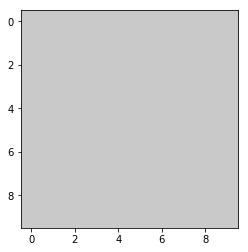

In [197]:
c = 0.5                                 # c is the coefficient for the ratio of transition, higher will be faster  
for t in range(0, 100):
    Phi = C0V*np.exp(-D*c*t)            # Exponential decay for each component
    Phi = V.dot(Phi)                    # Transform from eigenvector coordinate system to original coordinate system
    Phi = Phi.reshape(N, N);

plt.imshow(Phi,
           vmin=0, vmax=50,         # set color range 
           cmap="Greys",
           interpolation="none"
           )

In [198]:
#### Phi converges to 16 
Phi[:2]

array([[ 16.00005307,  16.00004976,  16.0000453 ,  16.00003978,
         16.00003366,  16.00002749,  16.00002187,  16.00001738,
         16.00001451,  16.00001368],
       [ 16.00004883,  16.00004613,  16.00004188,  16.00003656,
         16.00003063,  16.00002463,  16.00001915,  16.00001474,
         16.00001189,  16.0000109 ]])

### 3. use real data 

In [206]:
## load sample network 
G = nx.karate_club_graph()
## get adj matrix 
node_list = G.nodes()
node_list.sort()
Adj = np.array(nx.to_numpy_matrix(G=G,nodelist=node_list,weight='weight'))   
                ## we don't really have weight here
## node degree matrix D -- diagonal matrix with node degree on diag
Deg = np.diag(Adj.sum(axis=1))

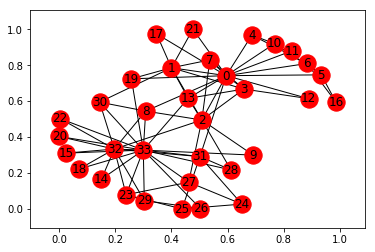

In [207]:
nx.draw_networkx(G)

In [268]:
## get laplacian
L = Deg - Adj                      ## compute the laplacian matrix 
D, V = np.linalg.eig(L)            ## D is eigenvalues and V is eigenvector matrix, each column is a eigenvector

### initiate 
C0 = np.zeros(len(node_list))
C0[-2]= 100
C0V = V.T.dot(C0)

c = 0.1                                 # c is the coefficient for the ratio of transition, higher will be faster  
for t in range(0, 100):
    Phi = C0V*np.exp(-D*c*t)            # Exponential decay for each component
    Phi = V.dot(Phi)                    # Transform from eigenvector coordinate system to original coordinate system


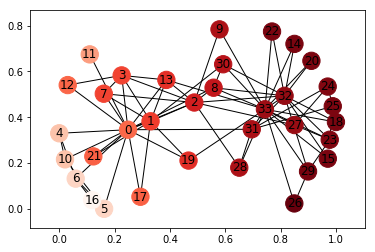

In [269]:
## Take a look at how it defuses through the newtwork
nx.draw_networkx(G,node_color=Phi,cmap=plt.cm.Reds,)